In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
# import requests
import sqlite3
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:

dbName = "rest_server/medisch_centrum_randstad/db.sqlite3"
tableName = "rest_api_netlify"
url = "http://localhost:8080/medish_centrum_randstad/api/netlify?page=1"
csvFile = "rest_server_new/medisch_centrum_randstad/data/data.csv"

In [3]:
#dbConnection = sqlite3.connect(dbName)
#dfFromDB = pd.read_sql_query(f"SELECT * FROM {'rest_api_netlify'}", dbConnection)
# sql adds index, remove:
#df = dfFromDB.drop('id', axis=1)
#pd.set_option('display.max_columns', 10)
# print(df.head())

In [4]:
df = pd.read_csv(r"C:\Users\jiyoo\workspace\project1\df2.csv", index_col = 0)
df.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [5]:
# remove negative values
df = df[(df >= 0).any(axis=1)]

In [6]:
df = df.drop_duplicates()

In [7]:
# convert non numeric to NaN
df = df.apply(lambda y: pd.to_numeric(y, errors='coerce') if y.dtype == 'object' else y)
df = df.apply(lambda y: pd.astype('float64') if y.dtype == 'object' else y)

In [8]:
df = df.dropna()

In [9]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,80.177693,6.487169,27.682076
std,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,7.840508,2.708622,8.711789
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,57.000000,0.700000,11.300000
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,75.000000,4.400000,20.900000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,79.700000,6.300000,26.500000
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,85.200000,8.400000,33.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,105.100000,13.800000,65.900000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4084 non-null   float64
 1   length    4084 non-null   float64
 2   mass      4084 non-null   float64
 3   exercise  4084 non-null   float64
 4   smoking   4084 non-null   float64
 5   alcohol   4084 non-null   float64
 6   lifespan  4084 non-null   float64
 7   sugar     4084 non-null   float64
 8   BMI       4084 non-null   float64
dtypes: float64(9)
memory usage: 319.1 KB


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error

In [12]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','BMI']]
y = train.lifespan

regr = LinearRegression()
regr.fit(X, y) 

score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','BMI']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) vanilla:', score)
a1=score

coefficient of determination(R²) vanilla: 0.9812233992575078


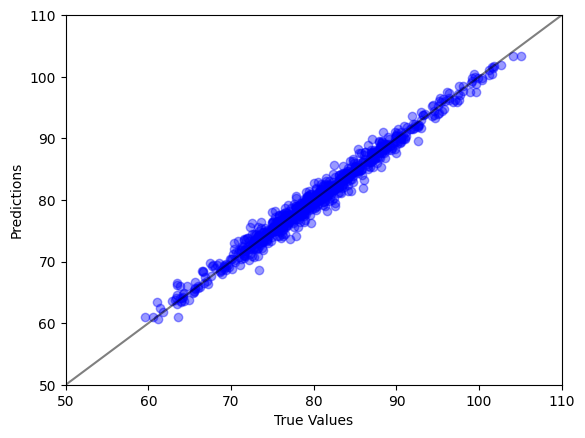

In [13]:
p_test = regr.predict(test.drop(columns=['lifespan']))

plt.scatter(test['lifespan'],p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

In [14]:
p_test

array([ 78.78691444,  67.72014591,  78.28131802,  95.1961223 ,
        78.58378673,  80.12758626,  82.50588092,  82.27256939,
        72.83993254,  72.73264299,  84.96609967,  76.43231147,
        77.2465341 ,  79.63416972,  77.44499399,  80.21607522,
        81.97414441,  78.28837808,  77.03371017,  77.90188313,
        79.91007713, 101.02842405,  88.89708913,  99.90798345,
        81.0876105 ,  73.13757742,  80.15579612,  85.16849915,
        78.45406181,  78.69874103,  80.80228499,  81.20359433,
        80.34722414,  98.42743682,  78.64965401,  83.95125557,
        85.29117913,  77.86229297,  80.47741828,  89.05978035,
        81.47677374,  75.10281831,  65.71705924,  78.0547135 ,
        82.13569292,  73.47848324,  75.64362961,  89.88388664,
        78.5232218 ,  72.22428207,  66.06519552, 101.43787822,
        82.31236991,  82.51500458,  69.1883074 ,  81.18388502,
        80.2970082 ,  64.12857218,  79.08553096,  93.9370269 ,
        74.9240873 ,  81.7563873 ,  85.1024645 ,  79.25

In [15]:
print('Mean Absolute Error:', mean_absolute_error( test['lifespan'], p_test))
print('Mean Squared Error:', mean_squared_error(test['lifespan'], p_test))
import math
print('Mean Root Squared Error:', math.sqrt(mean_squared_error(test['lifespan'], p_test)))

Mean Absolute Error: 0.8029535384602382
Mean Squared Error: 1.1627684682931139
Mean Root Squared Error: 1.078317424645041


If Mean Root Squard Error score is lower, it is more reliable.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [17]:
rng_forest_regr = RandomForestRegressor(n_estimators=100)
rng_forest_regr.fit(X,y)

RandomForestRegressor()

In [18]:
rng_forest_score = rng_forest_regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','BMI']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}):', rng_forest_score)

coefficient of determination(R²): 0.9731096304051875


In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
# Two feature
data = df[['lifespan', 'exercise']]

# Normalizing
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

# Applying K-means Cluster 

In [188]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

In [189]:
k = 3

# set the number and random_state
model = KMeans(n_clusters = k, random_state = 10)

# model traingin with normalized data
model.fit(data_scale)

# save the custer result per group
df['cluster'] = model.fit_predict(data_scale)
 

c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


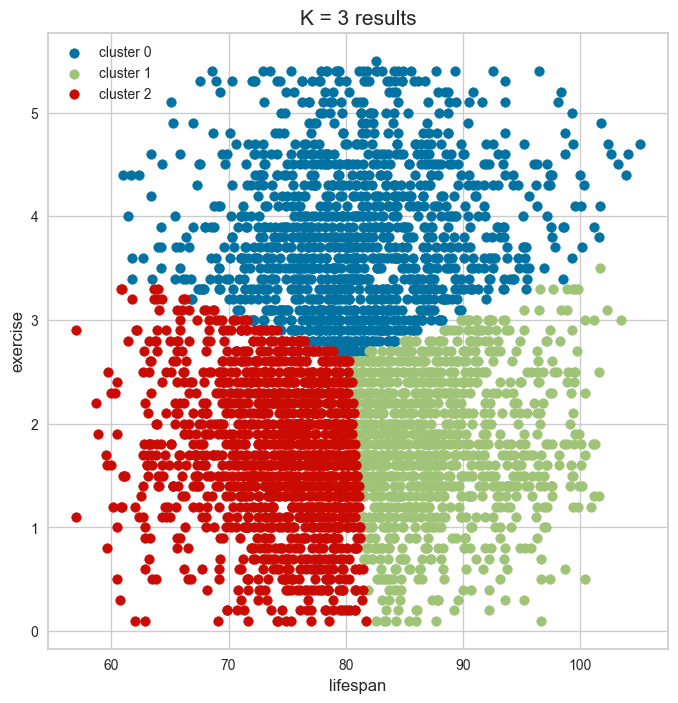

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'lifespan'], df.loc[df['cluster'] == i, 'exercise'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('lifespan', size = 12)
plt.ylabel('exercise', size = 12)
plt.show()

Visualizing K-means cluster between excerise & lifespan

In [191]:
from yellowbrick.cluster import KElbowVisualizer
# pip install yellowbrick

c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\si

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

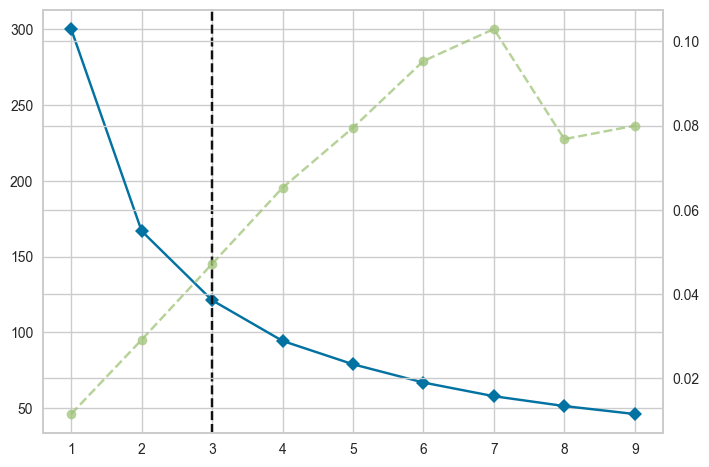

In [192]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

The implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for . If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line. The ideal number of clusters are suggested as 3.

In [193]:
data1 = df[['mass', 'smoking']]

# Normalizing data
scaler = MinMaxScaler()
data1_scale = scaler.fit_transform(data1)
#normalizing

In [195]:
k = 3

# set the number and random_state
model1 = KMeans(n_clusters = k, random_state = 10)

# model traingin with normalized data
model1.fit(data_scale)

# save the custer result per group
df['cluster'] = model1.fit_predict(data_scale)

c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


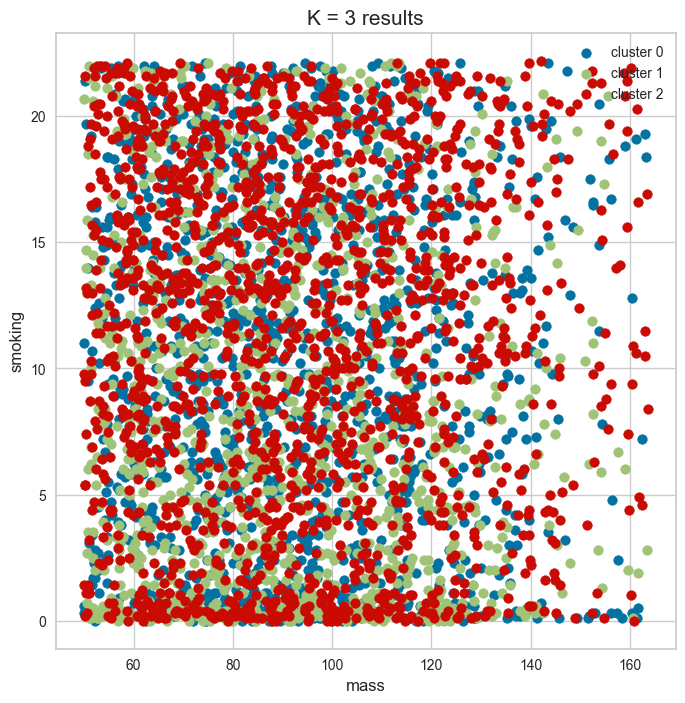

In [196]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'mass'], df.loc[df['cluster'] == i, 'smoking'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('mass', size = 12)
plt.ylabel('smoking', size = 12)
plt.show()

The correlation between smoking and mass.
Less clear clusters are visible comparing the clusters between excerise & lifespan

c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jiyoo\MakeAIWork\env\lib\si

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

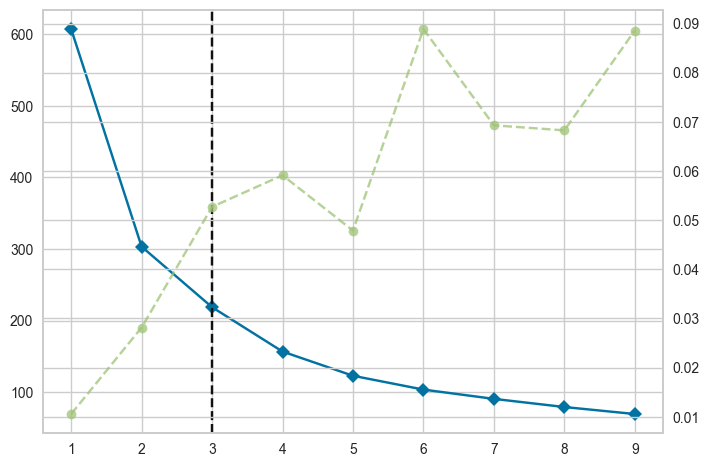

In [197]:
model1 = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data1_scale)

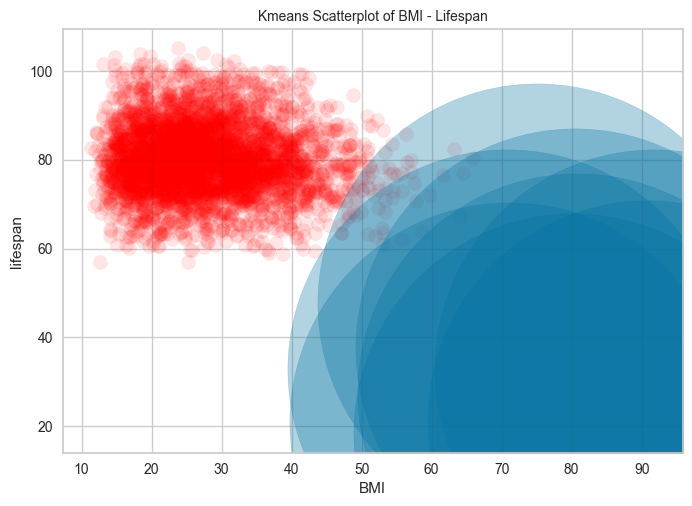

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# X = np.array([[1, 2], [1, 4], [1, 0],
#               [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(df[['lifespan','BMI']])

clusters = kmeans.cluster_centers_

plt.xlabel('BMI')
plt.ylabel('lifespan')
plt.scatter(df['BMI'], df['lifespan'], alpha = 0.1, s = 100, color='red')
plt.title("Kmeans Scatterplot of BMI - Lifespan", fontsize=10)
plt.scatter(clusters[:,0], clusters[:,1], s = 100000, alpha=0.30)

 Calculate the PremiumFactor for the insurance

In [ ]:
genetic = 82.28 # min=63.90 max=102.20
length = 183.89 # min = 154.00 max = etc
mass = 92.28
alcohol = 2.27
sugar = 6.49
smoking = 9.81
exercise = 2.40
BMI = round(mass/((length/100)**2))

lifespan_predict = regr.predict([[genetic, length, mass, alcohol, sugar, smoking, exercise, BMI]])
display(lifespan_predict)


c:\Users\jiyoo\MakeAIWork\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79.65704281])